In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
train=pd.read_csv('titanic_train.csv')

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
train.isnull()# برای مشاهده دیتاهایی که نداریمشان

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [57]:
train.isnull().sum()
#نشان دادن تعداد  دیتای ناموجود در هر ستون

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

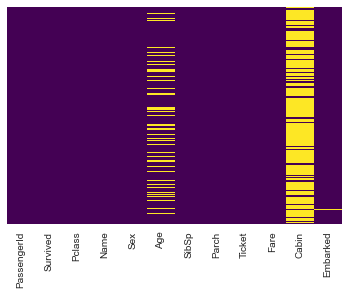

In [58]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#به صورت گرافیکی بخواهیم ببینیم که کدام دیتاها را نداریم

<AxesSubplot:xlabel='Survived', ylabel='count'>

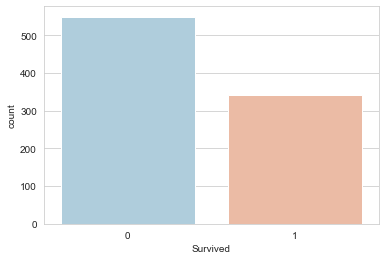

In [59]:
#میخواهیم ببینیم چند نفر زنده مانده اند و چند نفر فوت شده اند
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

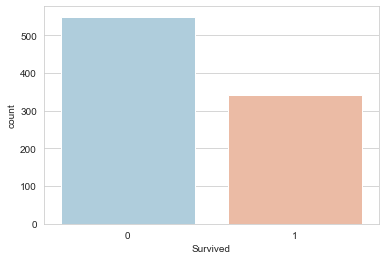

In [60]:
#اضافه نمودن خط افقی به نمودار
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

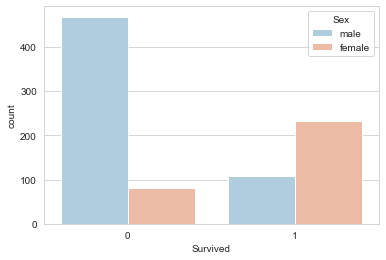

In [61]:
#میخواهیم به تفکیک جنسیت مشخص کنیم که چه تعدادی زنده مانده اند
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

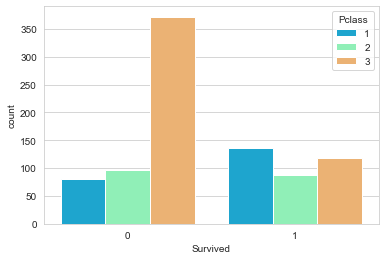

In [62]:
# میخواهیم ببینیم افرادی که زنده مانده اند بیشتر در کدام کلاس بوده اند . منظور از کلاس نوع بلیط است
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

C:\Users\EmPart\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

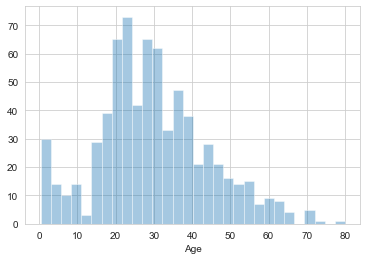

In [63]:

#میخواهیم سن مسافران را روی نمودار ببینیم
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

<AxesSubplot:ylabel='Frequency'>

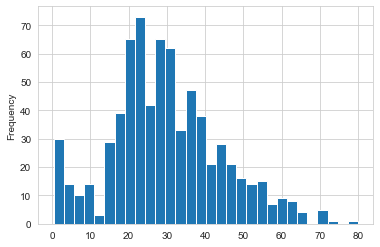

In [64]:
train['Age'].plot.hist(bins=30)
                    

In [65]:
#نمودار بالا نشان میدهد اکثریت افراد سن بین20 تا 40 داشته اند


In [66]:
#از ستونهای موجود ستون کابین را دراپ میکنیم. چون تعداد میسنگ والیو در آن زیاد است

In [67]:
train.drop('Cabin',axis=1,inplace=True)

In [68]:
#خانه های خالی را میتوان با میانگین سایر موارد پر نمود


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

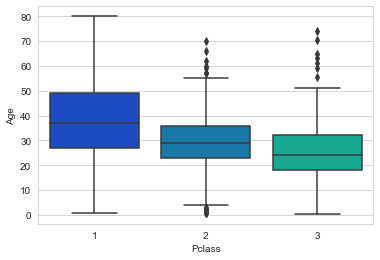

In [69]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')
#نمودار زیر به ما نشان میدهد که متوسط سن در هر دسته چقدر بوده است
#خط وسط نشانگر مقدار متوسط در هر دسته است


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

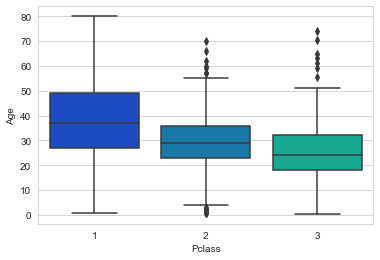

In [70]:
#plt.figure(figsize(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [71]:
#میخواهیم میانگین سنی گروه های مختلف را بدست بیاوریم
train[train['Pclass']==1]['Age'].mean()
#دستور بالا میگوید از کل دیتا ست ابتدا کلاس یک را انتخاب کن و سپس میانگین ستور سن را به ما برگردان

38.233440860215055

In [72]:
# کار بالا به روش ذیگر
train[train['Pclass']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,S
...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S


In [73]:
train[train['Pclass']==1]['Age']

1      38.0
3      35.0
6      54.0
11     58.0
23     28.0
       ... 
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: Age, Length: 216, dtype: float64

In [74]:
train[train['Pclass']==1]['Age'].mean()

38.233440860215055

In [75]:
#متوسط سن در کلاس یک و دو و سه مشخص است پس
#این تابع میخواهد سن های میس شده را پر کند
#میخواهیم خانه های خالی سن را با میانگین سنی هر گروه پر کنیم

#تابع ما باید دو مقدار ورودی دریافت کند. کلاس و سن


def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        
        elif Pclass==2:
            return 29
        
        else:
            return 25
    else:
        return Age

In [76]:
#در مرحله قبل یک تابع ساختیم
#حال با متو اپلای میخواهیم این تابع ساخته شده را روی دیتا ست خود اجرا کنیم
#بروبریم

train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

In [77]:
#چون قبلا یک بار دراپ کرده ایم الان دستور زیر ارور میدهد
#train.drop('Cabin',axis=1,inplace=True)

In [78]:
train.info()
#فقط ستون ایمبارک تعدادی دیتای میس شده دارد

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [79]:
#این ستون نشان میدهد که مسافر از کدام ایستگاه سوار شده است
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [80]:
#باتوجه به دستور قبلی چون اکثر مسافران از ایستگاه اس سوار شده اند دیتا را یکنواخت میکنیم و 
# مقادیر ناموجود را به نام اس ثبت میکنیم. یعنی اگر مشخص نباشد که مسافر از کدام ایستگاه سوار شده است
#فرض میکنیم که از اس سوار شده است

train['Embarked'].replace(np.nan,'S',inplace=True)

In [81]:
train.info()
# تمام دیتاها پر هستند و این خوب است
#حال میرویم سراغ ماشین لرنینگ و .... 
# برو بریم


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [82]:
#میخواهیم ببینیم که شخص زنده مانده است یا نه
#میخواهیم این موضوع را پیش بینی کنیم

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [83]:
#از ستون های بالا آنچه را که به درد ما نمیخورد را دراپ میکنیم 
#مثلا ایندکس-

#ستون سروایو تارگت ماست 
# کلاس مسافر مهم است
#نام مسافر در زنده ماندن تاثیر ندارد
#جنسیت تاثیر دارد
#سن تاثیر دارد
#تعداد خواهر برادر و همسر مهم است- ممکن است برای هم منتظر مانده باشند
#تیکت یا بلیط مهم نیست
#کرایه مهم است
#ایستگاه سوار شدن هم مهم است
#
# پس سه ستون را حذف میکنیم
#از ستون های باقی مانده سه ستون توصیفی هستند و عددی نیستند
#نام مسافر- تیکت- ایندکس

#باید این سه ستون را به نوع عددی تبدیل کنیم
#sex-embark -Pclass


In [84]:
#اصطلاحا به دامی واریبل تبدیل میکنیم
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)
pclass=pd.get_dummies(train['Pclass'],drop_first=True)

In [85]:
train.drop(['PassengerId','Sex','Embarked','Name','Ticket','Pclass'],axis=1,inplace=True)

In [86]:
#بعد از دستور قبلی جنسیت که با دو حرف نمایش داده میشد به صفر و یک تبدیل میشود
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [87]:
embark
#نکته
#زمانی که ایمبارک کیو و اس برابر یا صفر باشند، یعنی ایمبارک سی برابر با یک بوده است


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [88]:
pclass
#نکته
#زمانی کلاس دو و سه برابر با صفر باشند این یعنی کلاس سوم برابر با یک است

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [89]:
#حال ستونهایی مه از ترین باقی مانده اند را با ستون های جدیدی که ساخته ایم کنکتنیت میکنیم
#concatenate
train=pd.concat([train,sex,embark,pclass],axis=1)

In [90]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x1_train  ,x1_test   ,y1_train,y1_test =train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.3,random_state=101)


In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
logmodel=LogisticRegression()

In [95]:
logmodel.fit(x1_train,y1_train)

C:\Users\EmPart\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
predictions=logmodel.predict(x1_test)
#از مدل میخواهیم که ایکس تست را برای ما پیش بینی کند

In [97]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [98]:
y1_test

331    0
700    1
748    0
751    1
481    0
      ..
388    0
416    1
407    1
482    0
829    1
Name: Survived, Length: 268, dtype: int64

اگر مدل به درستی یک را پیش بینی کرده باشد ترو پازتیو داریم
اگر به اشتباه گفته باشد یک، میگوییم فالس پازتیو

اگربه اشتباه گفته باشد صفر است، میگوییم فالس نگتیو
اگر به درستی گفته باشد صفر است، میگوییم ترو  نگتیو


In [99]:
from sklearn.metrics import confusion_matrix

In [100]:
confusion_matrix(y1_test,predictions)

array([[136,  18],
       [ 38,  76]], dtype=int64)

In [101]:
from sklearn.metrics import classification_report


In [102]:
print(classification_report(y1_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.81      0.67      0.73       114

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268

